In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = '/content/drive/MyDrive/Prak Big Data Analytics/Per-10/glass.csv'

In [4]:
df_glass = pd.read_csv(dataset)
df_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df_glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df_glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


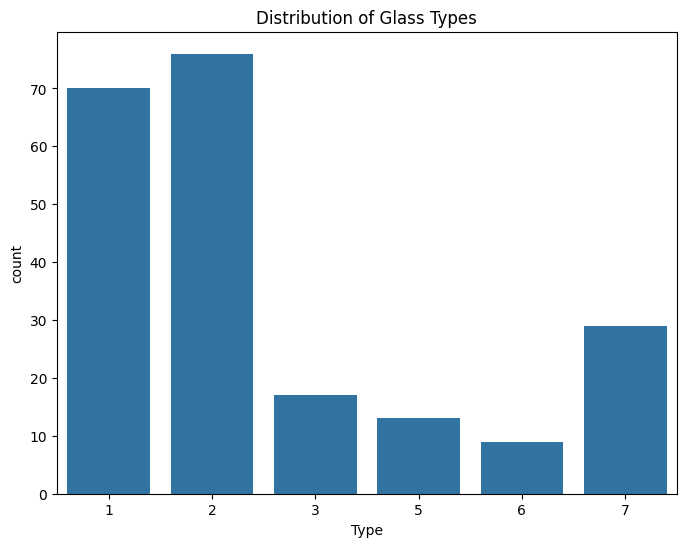

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(x='Type', data=df_glass)
plt.title('Distribution of Glass Types')
plt.show()

In [8]:
# Membagi Column Input dan Output
X = df_glass.drop(columns='Type')
y = df_glass['Type']

In [9]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [12]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.2,0.00
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
116,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.0,0.10
173,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.0,0.00
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.0,0.00
...,...,...,...,...,...,...,...,...,...
56,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31
31,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.0,0.00
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.0,0.00
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00


In [13]:
y_train

163    5
117    2
116    2
173    5
103    2
      ..
56     1
31     1
72     2
184    6
19     1
Name: Type, Length: 171, dtype: int64

In [14]:
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (171, 9) (171,)
Shape for testing data (43, 9) (43,)


In [15]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
X_train, X_test

(array([[-1.11735132,  0.7861343 , -0.0723594 , ..., -2.23272758,
          4.57347142, -0.59584288],
        [-0.44922441,  0.41559538,  0.65893245, ..., -0.77374396,
         -0.31595411, -0.59584288],
        [-0.03250608, -0.19771042,  0.81981665, ..., -0.46162308,
         -0.31595411,  0.39241253],
        ...,
        [-0.84527902, -0.38936849,  0.59311618, ..., -0.81003708,
         -0.31595411, -0.59584288],
        [-2.49148861,  5.0920521 , -2.03222157, ..., -1.66655483,
         -0.31595411, -0.59584288],
        [-0.35623768, -0.47880891,  0.55655159, ..., -0.36726096,
         -0.31595411,  0.0959359 ]]),
 array([[ 6.85712160e-01,  9.68297964e-02, -1.33484999e-01,
          1.78254957e-01, -5.60906501e-01, -2.47355089e-04,
          3.61328346e-01, -5.67602331e-02,  1.61408204e+00],
        [-5.79555884e-01, -4.94907848e-01,  7.74411382e-01,
         -4.36704795e-02,  2.41003305e-01,  8.48427955e-02,
         -6.09741585e-01, -4.84673419e-01, -5.62844105e-01],
        [-9

In [28]:
# SVC
model = SVC()
model.fit(X_train, y_train)
predicted_SVM = model.predict(X_test)
print('Accuracy SVM: ', accuracy_score(y_test, predicted_SVM)*100, '%')
print(confusion_matrix(y_test, predicted_SVM))
print(classification_report(predicted_SVM, y_test))

Accuracy SVM:  65.11627906976744 %
[[10  2  0  0  0  0]
 [ 6  9  0  0  1  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.83      0.53      0.65        19
           2       0.56      0.64      0.60        14
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.90      1.00      0.95         9

    accuracy                           0.65        43
   macro avg       0.38      0.36      0.37        43
weighted avg       0.74      0.65      0.68        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
predicted_KNN = model.predict(X_test)
print('Accuracy KNN: ', accuracy_score(y_test, predicted_KNN)*100, '%')
print(confusion_matrix(y_test, predicted_KNN))
print(classification_report(predicted_KNN, y_test))

Accuracy KNN:  65.11627906976744 %
[[10  2  0  0  0  0]
 [ 6  9  0  1  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  1  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.83      0.53      0.65        19
           2       0.56      0.64      0.60        14
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.90      1.00      0.95         9

    accuracy                           0.65        43
   macro avg       0.38      0.36      0.37        43
weighted avg       0.74      0.65      0.68        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
